In [1]:
from pathlib import Path

import random

import torch
import seaborn as sns
from scipy.stats import gaussian_kde

from src.loaders import DataLoader
from src.utils.loaders import load_variable
from src.utils.plots import save_data_plot
from src.utils.features import asymmetry2d, fractal_dimension2d, efficiency2d, emsd2d

In [2]:
config_path = Path("configs/main/config.py")
dataset_path = Path(".data")

In [3]:
config = load_variable("config", config_path)
train_loader, val_loader, test_loader = DataLoader.get_loaders(path_to_data=dataset_path, config=config)

Applying test preprocessors ...: 100%|██████████| 1/1 [00:00<00:00, 250.68it/s]


In [4]:
AD = torch.stack([x for (x, y) in train_loader.dataset if y.argmax() == 0])
CD = torch.stack([x for (x, y) in train_loader.dataset if y.argmax() == 1])
DM = torch.stack([x for (x, y) in train_loader.dataset if y.argmax() == 2])
ND = torch.stack([x for (x, y) in train_loader.dataset if y.argmax() == 3])


tensor_dataset = torch.cat([AD.unsqueeze(dim=0), CD.unsqueeze(dim=0), DM.unsqueeze(dim=0), ND.unsqueeze(dim=0)]).squeeze()

In [5]:
for index in range(4):
    trajectory_index = random.randint(0, len(tensor_dataset[0]))
    data = tensor_dataset[index][trajectory_index].squeeze()

    save_data_plot(data, path=f".data/data_analyse/category_{index}", mark_edges=True)

In [6]:
asymmetry = torch.zeros((4, len(AD)))
fractal_dimension = torch.zeros((4, len(AD)))
efficiency = torch.zeros((4, len(AD)))
emsd = torch.zeros((4, len(AD)))

In [7]:
for index in range(4):

    for trajectory_index, trajectory in enumerate(tensor_dataset[index]):
        asymmetry[index][trajectory_index] = asymmetry2d(trajectory)
        fractal_dimension[index][trajectory_index] = fractal_dimension2d(trajectory)
        efficiency[index][trajectory_index] = efficiency2d(trajectory)
        emsd[index][trajectory_index] = emsd2d(trajectory, lag=400)

    print(f"Done {index}")

Done 0
Done 1
Done 2
Done 3


In [8]:
print("AD asymmetry: ", asymmetry[0].mean())
print("CD asymmetry: ", asymmetry[1].mean())
print("DM asymmetry: ", asymmetry[2].mean())
print("ND asymmetry: ", asymmetry[3].mean())

AD asymmetry:  tensor(-3.0170)
CD asymmetry:  tensor(-2.3225)
DM asymmetry:  tensor(-5.6044)
ND asymmetry:  tensor(-3.8859)


In [9]:
print("AD fractal_dimension: ", fractal_dimension[0].mean())
print("CD fractal_dimension: ", fractal_dimension[1].mean())
print("DM fractal_dimension: ", fractal_dimension[2].mean())
print("ND fractal_dimension: ", fractal_dimension[3].mean())

AD fractal_dimension:  tensor(3.6325)
CD fractal_dimension:  tensor(3.5234)
DM fractal_dimension:  tensor(1.7387)
ND fractal_dimension:  tensor(2.0996)


In [10]:
print("AD efficiency: ", efficiency[0].mean())
print("CD efficiency: ", efficiency[1].mean())
print("DM efficiency: ", efficiency[2].mean())
print("ND efficiency: ", efficiency[3].mean())

AD efficiency:  tensor(27.9854)
CD efficiency:  tensor(20.6740)
DM efficiency:  tensor(4823.2856)
ND efficiency:  tensor(473.4775)


In [11]:
print("AD emsd: ", emsd[0].mean())
print("CD emsd: ", emsd[1].mean())
print("DM emsd: ", emsd[2].mean())
print("ND emsd: ", emsd[3].mean())

AD emsd:  tensor(135.7295)
CD emsd:  tensor(46.7154)
DM emsd:  tensor(4138.8569)
ND emsd:  tensor(481.8127)


In [12]:
for index in range(4):
    data = [range(len(asymmetry[index])), asymmetry[index]]
    save_data_plot(data, path=f".data/data_analyse/asymmetry_{index}")

In [13]:
for index in range(4):
    data = [range(len(fractal_dimension[index])), fractal_dimension[index]]
    save_data_plot(data, path=f".data/data_analyse/fractal_dimension_{index}")

In [14]:
for index in range(4):
    data = [range(len(efficiency[index])), efficiency[index]]
    save_data_plot(data, path=f".data/data_analyse/efficiency_{index}")

In [15]:
for index in range(4):
    data = [range(len(emsd[index])), emsd[index]]
    save_data_plot(data, path=f".data/data_analyse/emsd_{index}")

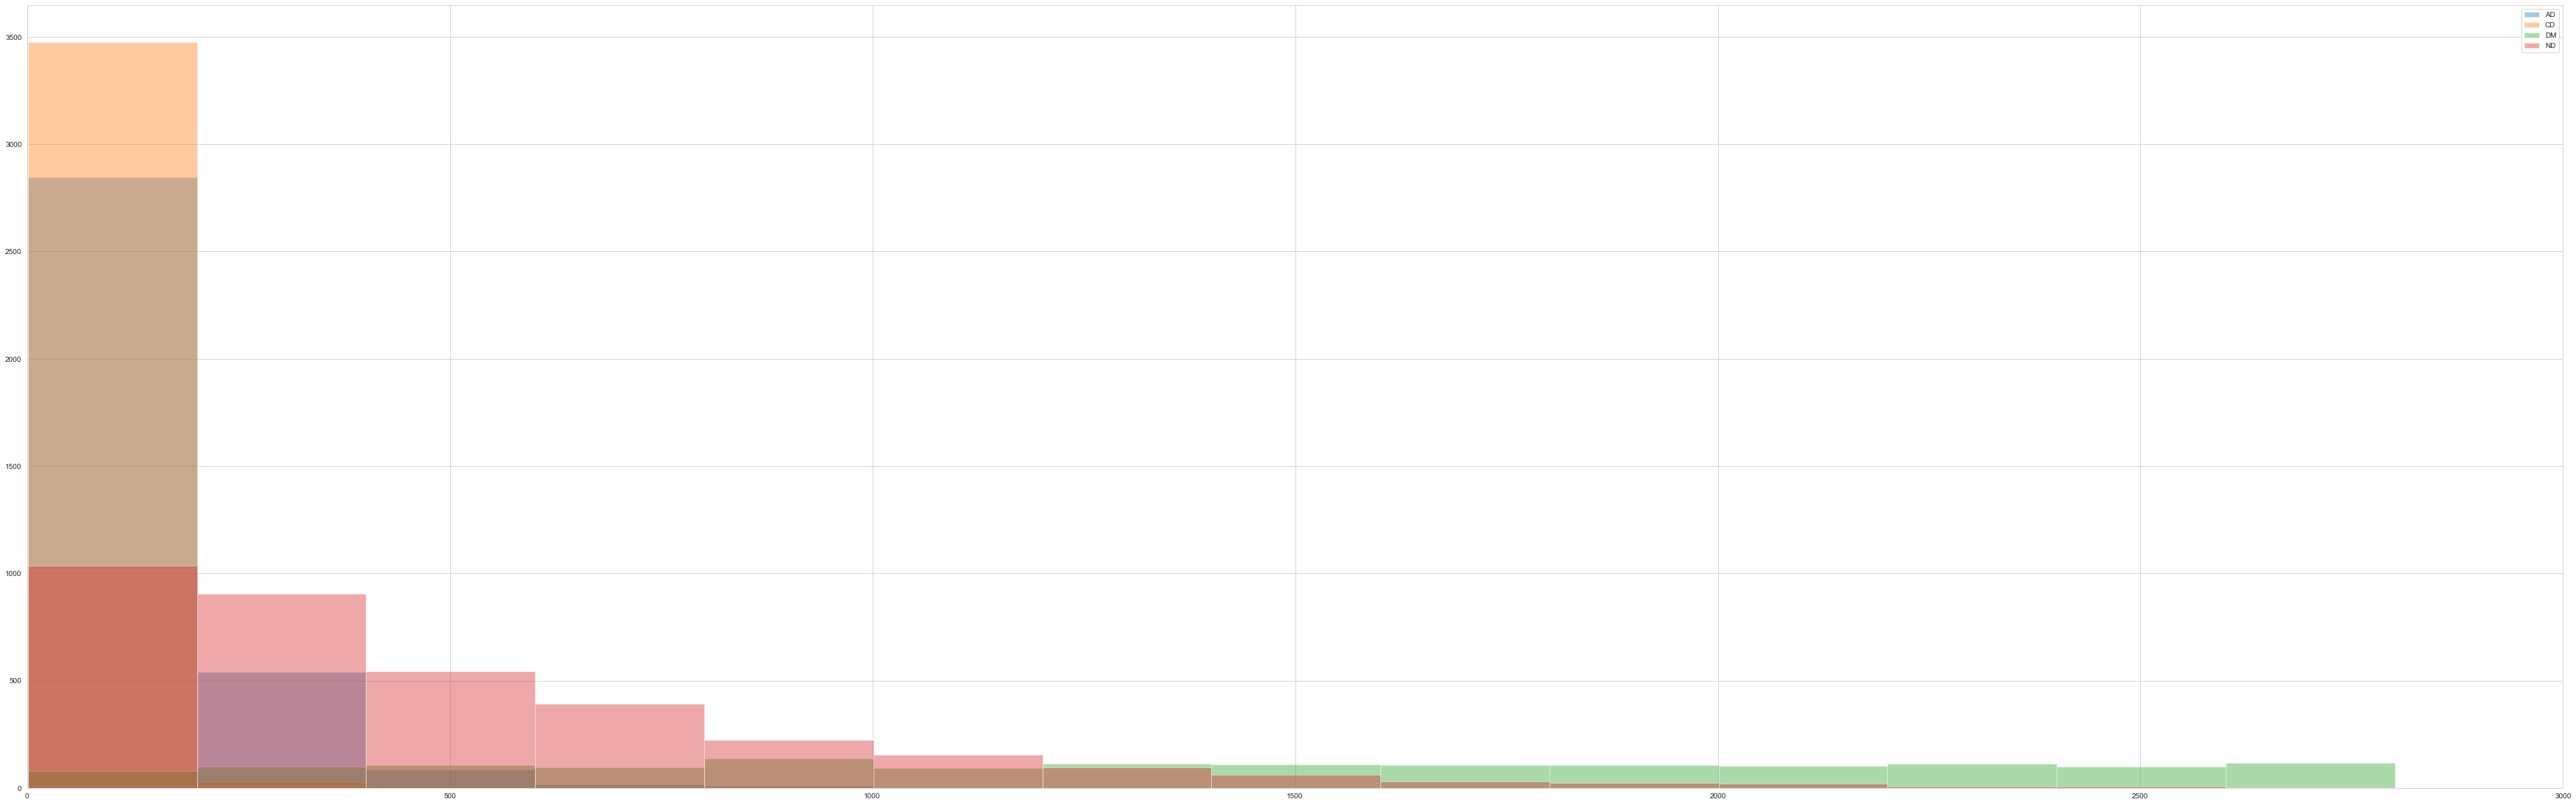

In [16]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
labels = ["AD", "CD", "DM", "ND"]

fig, ax = plt.subplots()
for a, label in zip(emsd, labels):
    sns.distplot(a, bins=range(1, 3000, 200), ax=ax, kde=False, label=label)
ax.set_xlim([0, 3000])

plt.gcf().set_size_inches(20.5, 6.5)

plt.legend()
plt.savefig(".data/data_analyse/emsd_distribution.png", transparent=True, dpi=400)
plt.show()

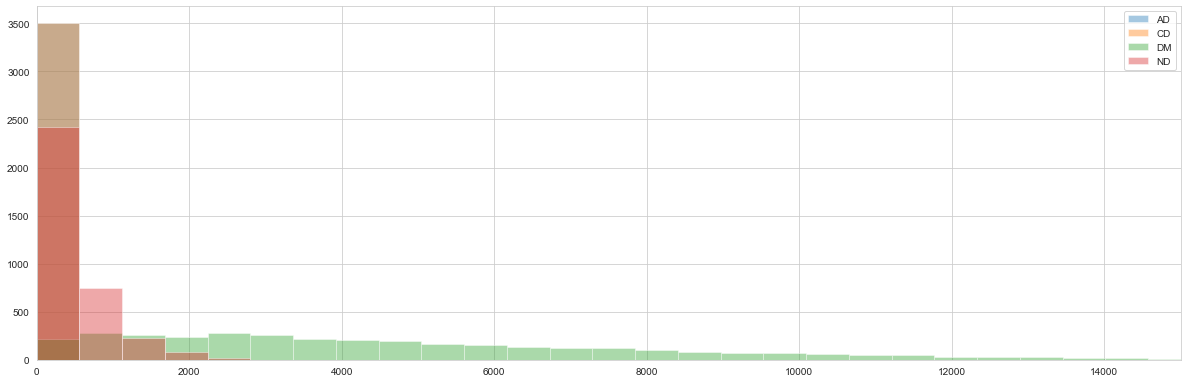

In [61]:
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
labels = ["AD", "CD", "DM", "ND"]

fig, ax = plt.subplots()
for a, label in zip(efficiency, labels):
    sns.distplot(a, bins=np.arange(efficiency.min(), efficiency.max(),  (efficiency.max() -  efficiency.min())/40), ax=ax, kde=False, label=label)
ax.set_xlim([0, 15000])

plt.gcf().set_size_inches(20.5, 6.5)

plt.legend()
plt.savefig(".data/data_analyse/efficiency_distribution.png", transparent=True)
plt.show()

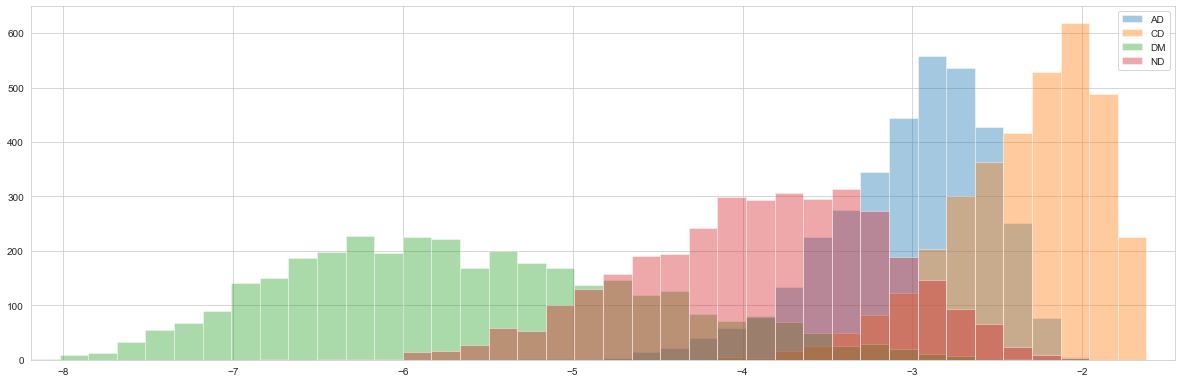

In [62]:
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
labels = ["AD", "CD", "DM", "ND"]

fig, ax = plt.subplots()
for a, label in zip(asymmetry, labels):
    sns.distplot(a, bins=np.arange(asymmetry.min(), asymmetry.max(),  (asymmetry.max() -  asymmetry.min())/40), ax=ax, kde=False, label=label)
ax.set_xlim([asymmetry.min(), asymmetry.max()])

plt.gcf().set_size_inches(20.5, 6.5)

plt.legend()
plt.savefig(".data/data_analyse/asymmetry_distribution.png", transparent=True)
plt.show()

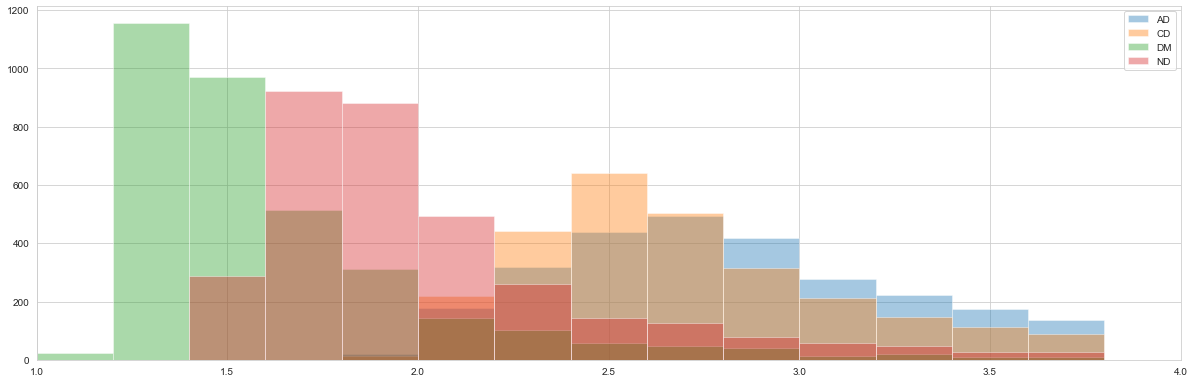

In [74]:
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
labels = ["AD", "CD", "DM", "ND"]

fig, ax = plt.subplots()
for a, label in zip(fractal_dimension, labels):
    sns.distplot(a, bins=np.arange(1, 4, 0.2), ax=ax, kde=False, label=label)
ax.set_xlim([1, 4])

plt.gcf().set_size_inches(20.5, 6.5)

plt.legend()
plt.savefig(".data/data_analyse/fractal_dimension_distribution.png", transparent=True)
plt.show()

In [65]:
fractal_dimension.min()

tensor(-1098.2266)